In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#install tensorflow 1.15
!pip install tensorflow==1.15

#Check tensorflow version
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 412.3 MB 26 kB/s 
     |████████████████████████████████| 3.8 MB 38.4 MB/s 
     |████████████████████████████████| 503 kB 49.2 MB/s 
     |████████████████████████████████| 50 kB 6.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=4279de35c12d0167ec94815ce6a1b60ff25e4bad777d7cae54384ad94f31ed5a
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2303776130954515366, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12273151410966662184
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14377710460780451941
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11338832282
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15517458036589615594
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [ ]:
import os
import glob
import xml.etree.ElementTree as ET
import pandas as pd

In [ ]:
'''
# Folders Needs to Created  on below the path
/content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01
  - data
  - training
  - upload annotations.zip
  - uplodad images.zip
  - upload 'xml_to_csv.py'
    - https://github.com/SanthoshNKumar/ComputerVision/blob/main/%2303%20Object%20Detection/%2304%20TFOD/xml_to_csv.py
  - upoad 'generate_tfrecord.py' file
      - https://github.com/techzizou/Train-Object-Detection-Model-TF-1.x

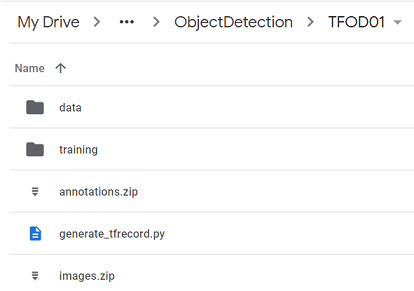

In [ ]:
# Clone the TensorFlow models git repository & Install TensorFlow object detection API

!git clone --q https://github.com/tensorflow/models.git

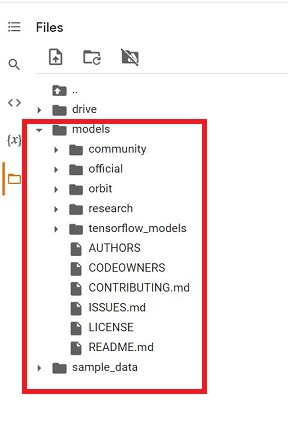

In [ ]:
#navigate to /models/research folder to compile protos
%cd models/research

# Compile protos.
!protoc object_detection/protos/*.proto --python_out=.

# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf1/setup.py .
!python -m pip install .

/content/models/research
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 352 kB 10.9 MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1679303 sha256=7ed729cb167251287e9566ba5bd9d303093898176a3c8f9a379b4e7d78a86baf
  Stored in directory: /tmp/pip-ephem-wheel-cache-vzhde9wy/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
Successfully built object-detection


In [ ]:
!python object_detection/builders/model_builder_tf1_test.py

Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params0 (True)
[       OK ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params0 (True)
[ RUN      ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params1 (False)
[       OK ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params1 (False)
[ RUN      ] ModelBuilderTF1Test.test_create_experimental_model
[       OK ] ModelBuilderTF1Test.test_create_experimental_model
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature0 (True)
[       OK ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature0 (True)
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature1 (False)
[       OK ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature1 (False)
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_model_from_config_w

In [ ]:
# CHange the working directory to below the path

% cd /content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/data

/content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/data


In [ ]:
# Unzip the 'annotations.zip' and 'images.zip' files

!unzip /content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/annotations.zip -d .
!unzip /content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/images.zip -d .

Archive:  /content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/annotations.zip
   creating: ./annotations/
  inflating: ./annotations/Image01.xml  
  inflating: ./annotations/Image02.xml  
  inflating: ./annotations/Image03.xml  
  inflating: ./annotations/Image04.xml  
  inflating: ./annotations/Image05.xml  
  inflating: ./annotations/Image06.xml  
  inflating: ./annotations/Image07.xml  
  inflating: ./annotations/Image08.xml  
  inflating: ./annotations/Image09.xml  
  inflating: ./annotations/Image10.xml  
  inflating: ./annotations/Image11.xml  
  inflating: ./annotations/Image12.xml  
  inflating: ./annotations/waterbottle01.xml  
  inflating: ./annotations/waterbottle02.xml  
  inflating: ./annotations/waterbottle05jpg.xml  
  inflating: ./annotations/waterbottle06jpg.xml  
  inflating: ./annotations/waterbottle08.xml  
  inflating: ./annotations/waterbottle09.xml  
  inflating: ./annotations/waterbottle10.xml  
  inflating: ./annotations/waterbottle11.xml  
  

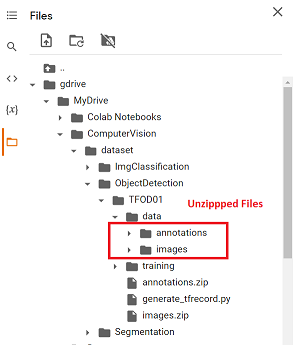

In [ ]:
#creating two dir for training and testing
!mkdir test_labels train_labels

# lists the files inside 'annotations' in a random order (not really random, by their hash value instead)
# Moves the first 274/1370 labels (20% of the labels) to the testing dir: `test_labels`
!ls annotations/* | sort -R | head -274 | xargs -I{} mv {} test_labels/


# Moves the rest of the labels ( 1096 labels ) to the training dir: `train_labels`
!ls annotations/* | xargs -I{} mv {} train_labels/

ls: cannot access 'annotations/*': No such file or directory


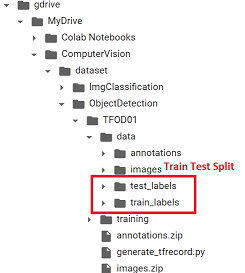

In [ ]:
'''
Create the CSV files and the “label_map.pbtxt” file
'''

!python /content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/xml_to_csv.py

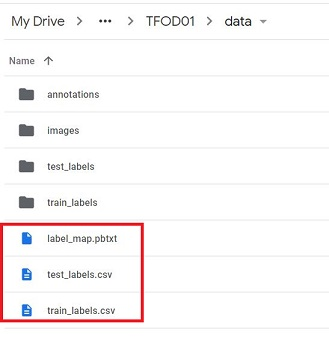

In [ ]:
#Usage:
#!python generate_tfrecord.py output.csv output_pb.txt /path/to/images output.tfrecords
#FOR train.record

!python /content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/generate_tfrecord.py train_labels.csv  label_map.pbtxt images/ train.record

#FOR test.record
!python /content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/generate_tfrecord.py test_labels.csv  label_map.pbtxt images/ test.record

groups: 0it [00:00, ?it/s]
Successfully created the TFRecords: /content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/data/train.record
groups: 100% 26/26 [00:00<00:00, 300.69it/s]
Successfully created the TFRecords: /content/gdrive/My Drive/ComputerVision/dataset/ObjectDetection/TFOD01/data/test.record


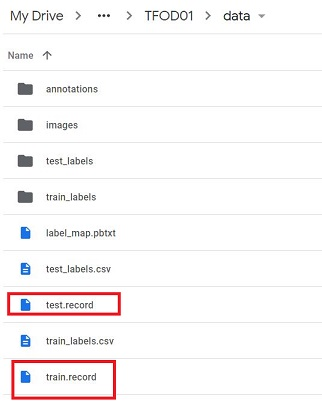

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz

!tar -xzvf ssd_mobilenet_v2_coco_2018_03_29.tar.gz

--2021-11-13 07:50:24--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.5.128, 2a00:1450:400c:c1b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.5.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187925923 (179M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’

ssd_mobilenet_v2_co 100%[===================>] 179.22M  25.6MB/s    in 11s     

2021-11-13 07:50:36 (15.9 MB/s) - ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’ saved [187925923/187925923]

ssd_mobilenet_v2_coco_2018_03_29/checkpoint
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.meta
ssd_mobilenet_v2_coco_2018_03_29/pipeline.config
ssd_mobilenet_v2_coco_2018_03_29/saved_model/saved_model.pb
ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb
ssd_mobilenet_v2_coco_2018_03_29/saved_model/
ssd_mobilenet_v2_coco_2018_03_29/saved_model

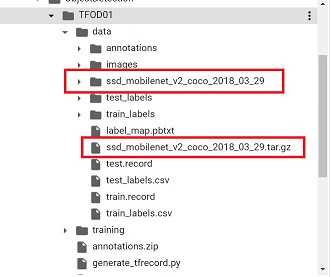

In [ ]:
'''
# Modify the Config file below the path
/content/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config

changes:
num_classes: 2
fine_tune_checkpoint: "/content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/data/ssd_mobilenet_v2_coco_2018_03_29/model.ckpt"

train_input_reader: {
  tf_record_input_reader {
    input_path: "/content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/data/train.record"
  }
  label_map_path: "/content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/data/label_map.pbtxt"
}

eval_input_reader: {
  tf_record_input_reader {
    input_path: "/content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/data/test.record"
  }
  label_map_path: "/content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/data/label_map.pbtxt"
  shuffle: false
  num_readers: 1
}

In [ ]:
'''
# Copy the modified Config file Source to Destination
from : /content/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config
to : /content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/data
'''

!cp /content/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config 
    /content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/data

In [ ]:
# Load Tensorboard

%load_ext tensorboard
%tensorboard --logdir '/content/gdrive/MyDrive/customTF1/training'

In [ ]:
# change the directory to Train the model

%cd /content/models/research/object_detection

/content/models/research/object_detection


In [ ]:
# Training & evaluation using model_main.py

'''
!python model_main.py --pipeline_config_path=/content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/data/ssd
_mobilenet_v2_coco.config 
--model_dir=/content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/training 
--num_train_steps=200000 
--sample_1_of_n_eval_examples=1 
--alsologtostderr

'''
!python model_main.py --pipeline_config_path=/content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/data/ssd_mobilenet_v2_coco.config --model_dir=/content/gdrive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/training --num_train_steps=200000 --sample_1_of_n_eval_examples=1 --alsologtostderr

W1113 08:11:19.104724 139864856639360 model_lib.py:817] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: 200000
I1113 08:11:19.105016 139864856639360 config_util.py:552] Maybe overwriting train_steps: 200000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1113 08:11:19.105163 139864856639360 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I1113 08:11:19.105323 139864856639360 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I1113 08:11:19.105472 139864856639360 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W1113 08:11:19.105651 139864856639360 model_lib.py:833] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
INFO:tensorflow:create_estimator_and_inputs: use_tpu False, export_

In [ ]:
# Test your trained model

# Export inference graph
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path /content/drive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/data/ssd_mobilenet_v2_coco.config --trained_checkpoint_prefix /content/drive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/training/model.ckpt-0 --output_directory /content/drive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/data/inference_graph

In [ ]:
# Test Your Model

# RUNNING INFERENCE
import numpy as np
import os
import cv2
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
from google.colab.patches import cv2_imshow
from collections import defaultdict
from io import StringIO
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

# This is needed to display the images.
%matplotlib inline

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# Change these values for the model used
num_classes = 2 # Change this value to the number of classes of the model
IMAGE_SIZE = (12, 8) # Output display size as you want

# Use images in test dir
IMAGE_DIR = "/content/drive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/data/images"
IMAGE_PATHS = []
for file in os.listdir(IMAGE_DIR):
    if file.endswith(".jpg") or file.endswith(".png"):
        IMAGE_PATHS.append(os.path.join(IMAGE_DIR, file))

# Set paths to the trained model
PATH_TO_LABELS = '/content/drive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/data/label_map.pbtxt'
PATH_TO_CKPT = os.path.join(os.path.abspath("/content/drive/MyDrive/ComputerVision/dataset/ObjectDetection/TFOD01/data/inference_graph"), "frozen_inference_graph.pb")


# Set tensorflow graph
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

# Set categories
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Convert input image to a numpy array
def load_image_to_numpy(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Inference pipeline
def run_inference(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, .5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

# Run the inference for each image
for image_path in IMAGE_PATHS:
    image = Image.open(image_path)
    # Conver the image to numpy array
    image_np = load_image_to_numpy(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Perform the interence
    output_dict = run_inference(image_np, detection_graph)
    # Visualize
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=20,
        min_score_thresh=0.1)
    plt.figure(figsize=IMAGE_SIZE, dpi=200)
    plt.axis("off")
    plt.imshow(image_np)